In [118]:
import matplotlib.pyplot as plt
import os
import math as m
import numpy as np
from scipy.optimize import curve_fit

%matplotlib inline

In [119]:
def errorbar(filename, no_of_mass):
    #Error bar calculations:
    f = open(filename, "r")
    mass_number = []
    for line in f:
        if line.find("#mass")>=0:
            tmp = line[5:].split(":")
            tmp.append(":")
            tmp = tmp[0].strip()+tmp[-1]+tmp[1].strip()
            mass_number.append(tmp)
    f.close()

    iterations = [int(i.split(":")[-1]) for i in mass_number]

    f = open(filename, "r")
    start = False
    no_of_times = 0
    raw_datas = []
    for line in f:
        if not line[0]=="#" and not line == "\n":
            line.strip()
            tmp = line.split()
            if tmp[0]=="ALL:":
                start = True
                continue
            if start:
                no_of_times += 1
                raw_datas.append(line.strip())
    f.close()
    no_of_datas_for_each_iterations = int(no_of_times/sum(iterations))


    values = []
    for datas in raw_datas:
        values.append(datas.split())
    values = [[float(i) for i in j] for j in values]

    #Separating data set for every iteration for all masses combined
    all_datas = []
    total =  no_of_datas_for_each_iterations
    for j in range(sum(iterations)):
        i = j*total
        all_datas.append(values[i:i+total])

    # Giving the data sets according to the iterations for each mass separately
    # The mass variables are stored like a dictionary
    samples = {}
    for i in range(no_of_mass):
        samples["mass_sample_{}".format(i)] = []

    k,l = 0, -1
    for i in iterations:
        l += 1
        for j in range(i):
            samples["mass_sample_{}".format(l)].append(all_datas[k])
            k += 1

    # Getting all the ion counts and also calculating the mean of it for the iteration number of times
    k = 0
    data_run = no_of_datas_for_each_iterations
    mass_count_avg, all_mass_count = [], []

    for i in iterations:

        if i>1:
            to_avg = [[samples["mass_sample_{}".format(k)][j][m][2] for m in range(data_run)] for j in range(i)]
            all_mass_count.append(to_avg)
            mass = [[to_avg[l][j] for l in range(i)] for j in range(data_run)]
            mass_count = [sum(mass[j])/i for j in range(len(mass))]
            mass_count_avg.append(mass_count)
        k += 1

    # Calculating varience
    more_iterations_count = 0
    for i in iterations:
        if i>1:
            more_iterations_count += 1

    varience_adder, varience_collector, varience = [],[],[]

    for i in range(more_iterations_count):

        for j in range(data_run):

            for k in range(len(all_mass_count[i])):
                x, mu = all_mass_count[i][k][j], mass_count_avg[i][j]
                varience_adder.append((x-mu)**2)

            varience_collector.append(sum(varience_adder)/(len(varience_adder)-1))
            varience_adder = []

        varience.append(varience_collector)
        varience_collector = []

    #Standard deviations and standard error
    no_of_moreiterations = []
    for i in iterations:
        if i>1:
            no_of_moreiterations.append(i)

    standard_deviation = [[m.sqrt(i) for i in varience[j]] for j in range(len(varience))]
    standard_error = [[i/m.sqrt(no_of_moreiterations[j]) for i in standard_deviation[j]] for j in range(len(standard_deviation))]
    
    return standard_error, iterations, samples

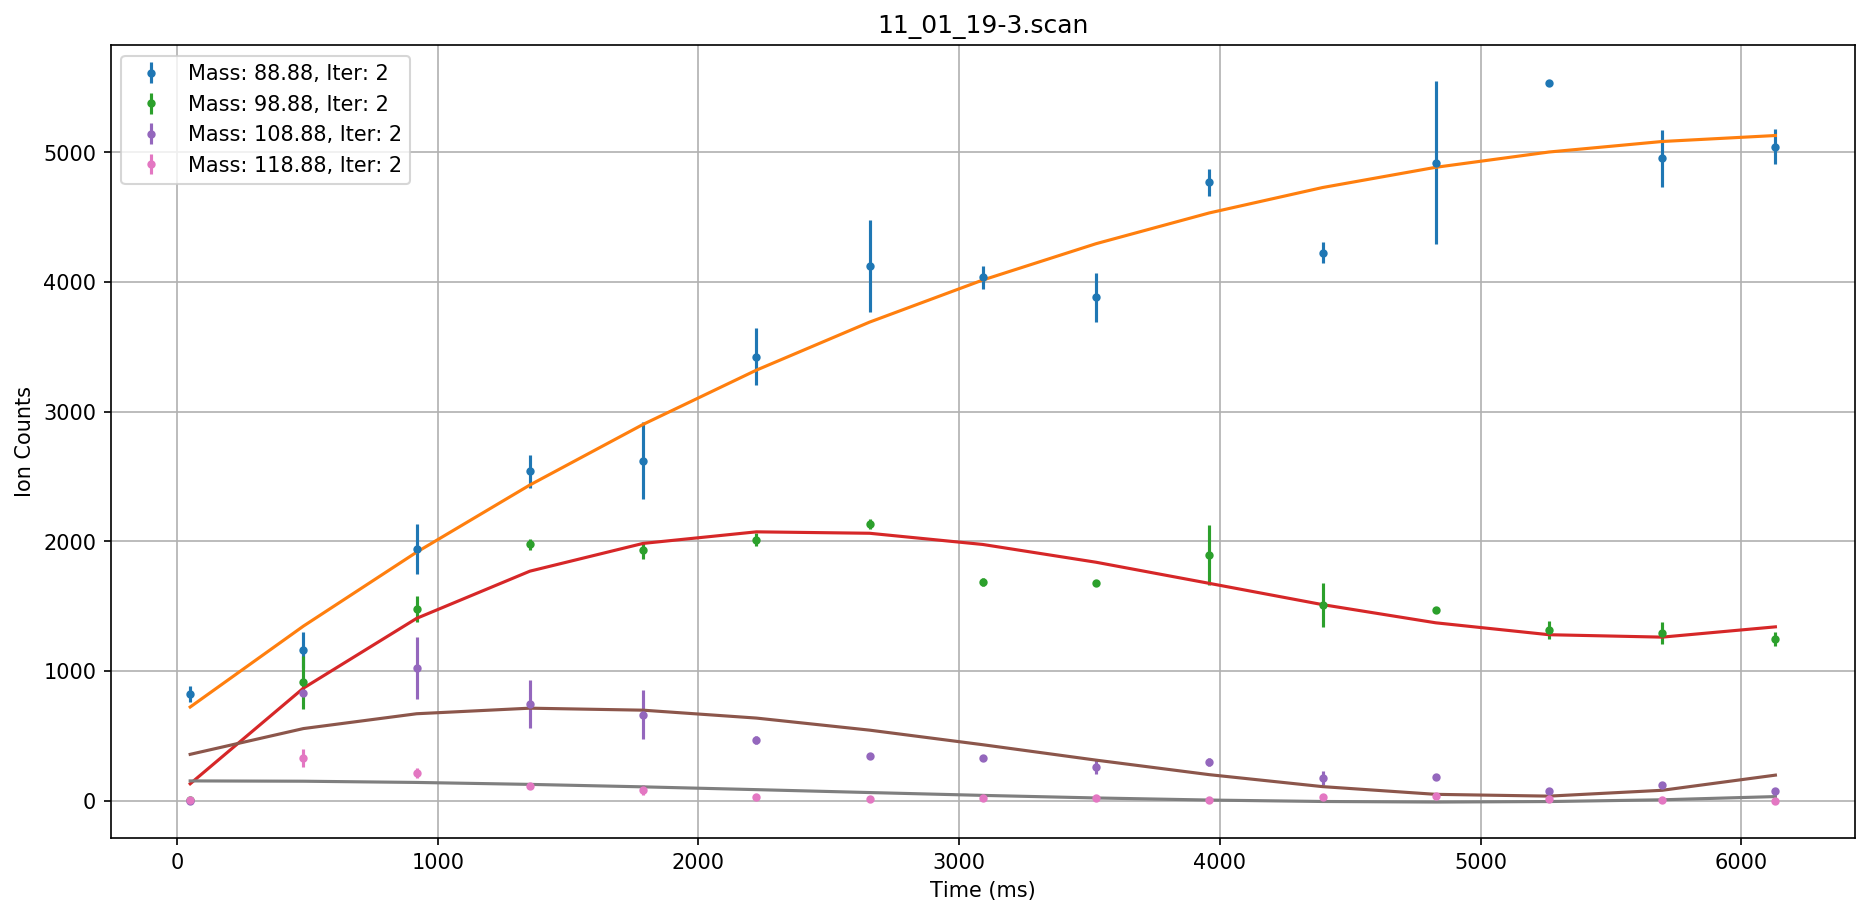

In [128]:
filename = "11_01_19-3.scan"
datas = []
f = open(filename, "r")

for line in f:
    if not line[0] == "#" and not line == "\n":
        a = line.split()
        datas.append(a)
        if line.strip() == "ALL:":
            del datas[-1]
            break
no_of_mass = len(datas[0])-2

f.close()

d = {}

for i in range(no_of_mass):
    d["mass_#{0}".format(i)] = []

for i in range(len(d)):
    d['mass_#{}'.format(i)] = [float(j[i+1]) for j in datas]

time = [float(i[0]) for i in datas]

error, iterations, mass_values = errorbar(filename, no_of_mass)
tmp = []
if len(error[0])>len(time):
    for i in error:
        del i[-1]
        tmp.append(i)
    error = tmp

plt.figure(figsize=(15, 7), dpi=150)
j = 0
deg = 3
for i in range(no_of_mass):
    if iterations[i]>1:
        x, y = time, d["mass_#{}".format(i)]
        lg = "Mass: "+str(mass_values["mass_sample_{}".format(i)][0][0][0])+", Iter: "+str(iterations[i])
        
        plt.errorbar(x, y, yerr = error[j], fmt = ".", label = lg)
        
        z = np.polyfit(x, y, deg)
        p = np.poly1d(z)
        y_fit = [p(i) for i in x]

        plt.plot(x, y_fit)
        j += 1


plt.grid(True)
plt.xlabel("Time (ms)")
plt.ylabel("Ion Counts")
plt.legend()
plt.title(filename)
plt.savefig(filename+".png")
plt.show()
plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


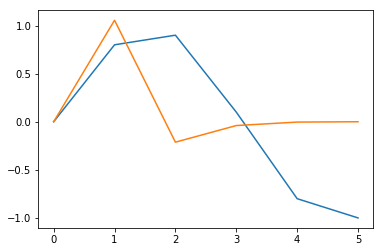

In [47]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


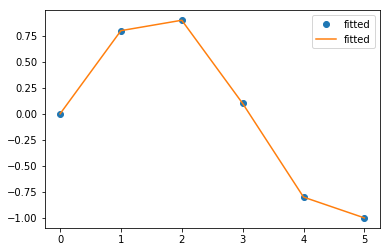

In [82]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])


plt.plot(x,y, "o", x, y_fit, "-", label = "fitted")
plt.legend()

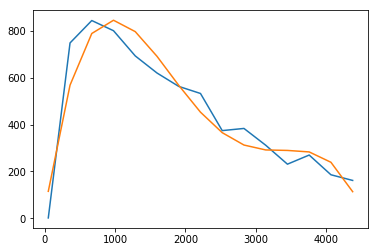

In [100]:
x, y = time, d["mass_#2"]
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
y_fit = [p(i) for i in x]
plt.plot(x, y, "-", x, y_fit)

In [7]:
data = [[1,1],[4,3],[8,3],[11,4],[10,7],[15,11],[16,12]]
x, y = zip(*data)
print(x, y, *data)

(1, 4, 8, 11, 10, 15, 16) (1, 3, 3, 4, 7, 11, 12) [1, 1] [4, 3] [8, 3] [11, 4] [10, 7] [15, 11] [16, 12]


In [8]:
f = open(filename)
start = False
raw_datas = []
no_of_mass = 0
for line in f:
    if line.find("#mass")>=0:
            no_of_mass += 1
    if not line[0] == "#" and not line == "\n":
        if line.strip() == "ALL:":
            start = True
        if start:
            raw_datas.append(line)
        

f.close()
del raw_datas[0]

all_datas = [i.split() for i in raw_datas]

all_datas_infloat = []
for i in all_datas:
    tmp = [float(j) for j in i]
    all_datas_infloat.append(tmp)
print(no_of_mass)

3


In [9]:
test = [[1,2], [3, 4]]
x, y = zip(*test)
print("x is: ",x,"\n","y is: ",y)


x is:  (1, 3) 
 y is:  (2, 4)


In [10]:
# initializing lists 
name = [ "Manjeet", "Nikhil", "Shambhavi", "Astha" ] 
roll_no = [ 4, 1, 3, 2 ] 
marks = [ 40, 50, 60, 70 ] 
  
# using zip() to map values 
mapped = zip(name, roll_no, marks)
print(mapped, type(mapped))
  
# converting values to print as set 
mapped = set(mapped) 
print(mapped, type(mapped))

mapped = list(mapped) 
print(mapped, type(mapped), type(mapped[0]))


<zip object at 0x00000130F506E388> <class 'zip'>
{('Manjeet', 4, 40), ('Shambhavi', 3, 60), ('Nikhil', 1, 50), ('Astha', 2, 70)} <class 'set'>
[('Manjeet', 4, 40), ('Shambhavi', 3, 60), ('Nikhil', 1, 50), ('Astha', 2, 70)] <class 'list'> <class 'tuple'>


In [11]:
statement = "This is for testing"
for i in statement: print(i, end = "")

This is for testing

In [12]:
x, y = (1, 2)
x, y

(1, 2)